<a href="https://colab.research.google.com/github/vutl/AIO-Exercises/blob/features%2Fvector-exercises/Module%202/Vector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bài 1**

a)

In [1]:
import numpy as np
def compute_vector_length ( vector ) :
  len_of_vector = np.linalg.norm(vector)
  return len_of_vector

# Test
vector = np.array([-2, 4, 9, 21])
result = compute_vector_length(vector)
print(round(result, 2))  #23.28

23.28


b)

In [2]:
def compute_dot_product(vector1, vector2):
    result = np.dot(vector1, vector2)
    return result

# Test
v1 = np.array([0, 1, -1, 2])
v2 = np.array([2, 5, 1, 0])
result = compute_dot_product(v1, v2)
print(round(result, 2))  #3

4


c)

In [3]:
def matrix_multi_vector(matrix, vector):
    result = np.dot(matrix, vector)
    return result

# Test
m = np.array([[-1, 1, 1], [0, -4, 9]])
v = np.array([0, 2, 1])
result = matrix_multi_vector(m, v)
print(result)  #[1 1]

[3 1]


d)

In [4]:
def matrix_multi_matrix(matrix1, matrix2):
    result = np.dot(matrix1, matrix2)
    return result

# Test
m1 = np.array([[0, 1, 2], [2, -3, 1]])
m2 = np.array([[1, -3], [6, 1], [0, -1]])
result = matrix_multi_matrix(m1, m2)
print(result)  #[[6 -1], [-16 -10]]

[[  6  -1]
 [-16 -10]]


e)

In [5]:
def inverse_matrix(matrix):
    result = np.linalg.inv(matrix)
    return result

# Test
m1 = np.array([[-2, 6], [8, -4]])
result = inverse_matrix(m1)
print(result)  #[[0.1 0.15], [0.2 0.05]]

[[0.1  0.15]
 [0.2  0.05]]


# **Bài 2**

In [8]:
def compute_eigenvalues_eigenvectors(matrix):
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    return eigenvalues, eigenvectors

# Test
matrix = np.array([[0.9, 0.2], [0.1, 0.8]])
eigenvalues, eigenvectors = compute_eigenvalues_eigenvectors(matrix)
print(eigenvectors)  #[[0.89442719 -0.70710678], [0.4472136 0.70710678]]
print(eigenvalues) #[1. 0.7]

[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]
[1.  0.7]


# **Bài 3**

In [9]:
def compute_cosine(v1, v2):
    cos_sim = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    return cos_sim

# Test
x = np.array([1, 2, 3, 4])
y = np.array([1, 0, 3, 0])
result = compute_cosine(x, y)
print(round(result, 3))  #0.577

0.577


# **Bài 4**

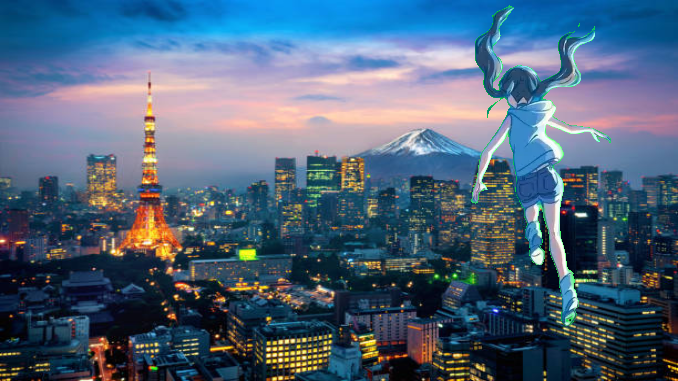

In [10]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def compute_difference(bg_img, input_img):
    difference = cv2.absdiff(bg_img, input_img)
    difference_single_channel = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)
    return difference_single_channel

def compute_binary_mask(difference_single_channel):
    _, difference_binary = cv2.threshold(difference_single_channel, 30, 255, cv2.THRESH_BINARY)
    return difference_binary

def replace_background(bg1_image, bg2_image, ob_image):
    difference_single_channel = compute_difference(bg1_image, ob_image)
    binary_mask = compute_binary_mask(difference_single_channel)
    output = np.where(binary_mask[:, :, np.newaxis] == 255, ob_image, bg2_image)
    return output

# Load and resize images
bg1_image = cv2.imread('/content/GreenBackground.png', 1)
bg1_image = cv2.resize(bg1_image, (678, 381))

ob_image = cv2.imread('/content/Object.png', 1)
ob_image = cv2.resize(ob_image, (678, 381))

bg2_image = cv2.imread('/content/NewBackground.jpg', 1)
bg2_image = cv2.resize(bg2_image, (678, 381))

# Perform background replacement
output_image = replace_background(bg1_image, bg2_image, ob_image)
cv2_imshow(output_image)